## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

In [2]:
# Checking the number of mice in the DataFrame.
combined_data["Mouse ID"].count()

1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_df = combined_data[combined_data.duplicated(subset=["Mouse ID","Timepoint"], keep="first")]

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
print(duplicate_df)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data[combined_data["Mouse ID"] != "g989"]
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_data["Mouse ID"].count()

1880

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.

# group by drug regimen
regimen_df = clean_data.groupby("Drug Regimen")

# then do the math
tumor_vol_mean = regimen_df["Tumor Volume (mm3)"].mean()
tumor_vol_median = regimen_df["Tumor Volume (mm3)"].median()
tumor_vol_var = regimen_df["Tumor Volume (mm3)"].var()
tumor_vol_std = regimen_df["Tumor Volume (mm3)"].std()
tumor_vol_sem = regimen_df["Tumor Volume (mm3)"].sem()

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_table = (pd.DataFrame({
    "Mean": tumor_vol_mean,
    "Median": tumor_vol_median,
    "Variance": tumor_vol_var,
    "Standard Deviation": tumor_vol_std,
    "Standard Error of the Mean": tumor_vol_sem
})).round(2)
summary_table

,Mean,Median,Variance,Standard Deviation,Standard Error of the Mean
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar Plots

In [10]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas. 
# Define x- and y-axis
x_axis = regimen_df["Drug Regimen"]
mice_vol = regimen_df["Mouse ID"]

regimen_df.head()

# Plot the bar chart with labels

# plt.bar(x_axis, mice_vol, color="b", alpha=0.5, align="center")
# plt.title("Number of mice per treatment")
# plt.xlabel("Drug Regimen")
# plt.ylabel("Number of Mice")

# regimen_df["Mouse ID"].count()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [ ]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

## Pie Plots

Text(0.5, 1.0, 'Mice Gender Distribution')

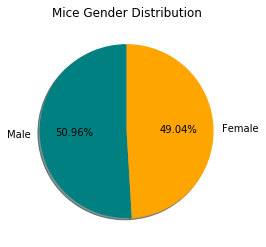

In [34]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# Groupby mouse gender
gender_df = clean_data["Sex"].value_counts()

# Labels for the sections of our pie chart
labels = ["Male", "Female"]

# The colors of each section of the pie chart
colors = ["teal", "orange"]

plt.pie(gender_df, labels=labels, colors=colors,
        autopct="%1.2f%%", shadow=True, startangle=90)
plt.title("Mice Gender Distribution")

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 


In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen



## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
